# Decision Tree 실습

In [1]:
from sklearn import tree
from sklearn.datasets import load_iris
from os import system

In [2]:
import graphviz

In [3]:
iris = load_iris()
display(iris.data[:5])
display(iris.feature_names)
display(iris.target)
display(iris.target_names)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 2. 의사결정나무 구축 및 시각화

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)

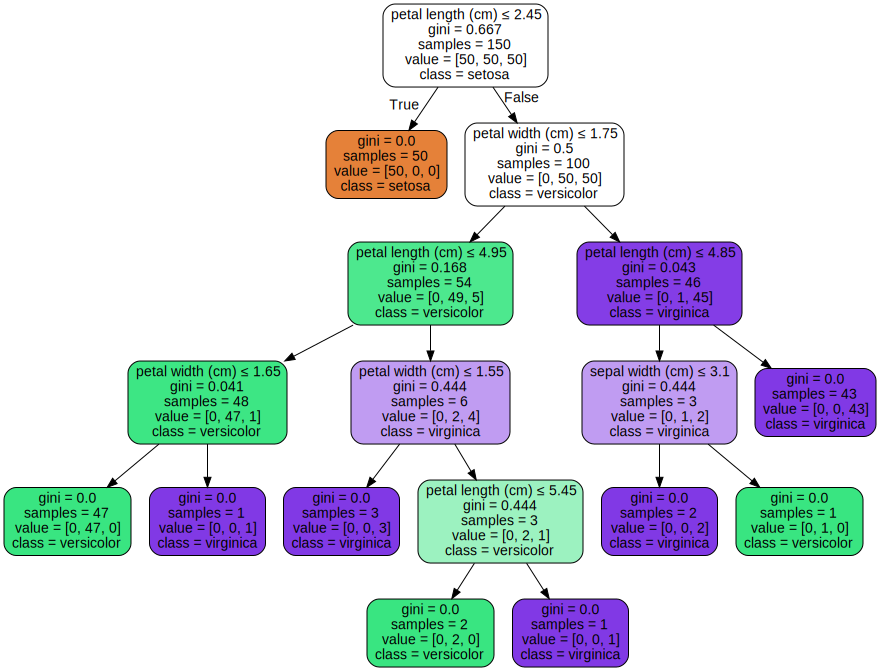

In [16]:
graph

In [17]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy")

In [18]:
clf2.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
dot_data2 = tree.export_graphviz(clf2, out_file=None,
                                 feature_names=iris.feature_names,
                                 class_names=iris.target_names,
                                 filled=True, rounded=True,
                                 special_characters=True)
graph2 = graphviz.Source(dot_data2)

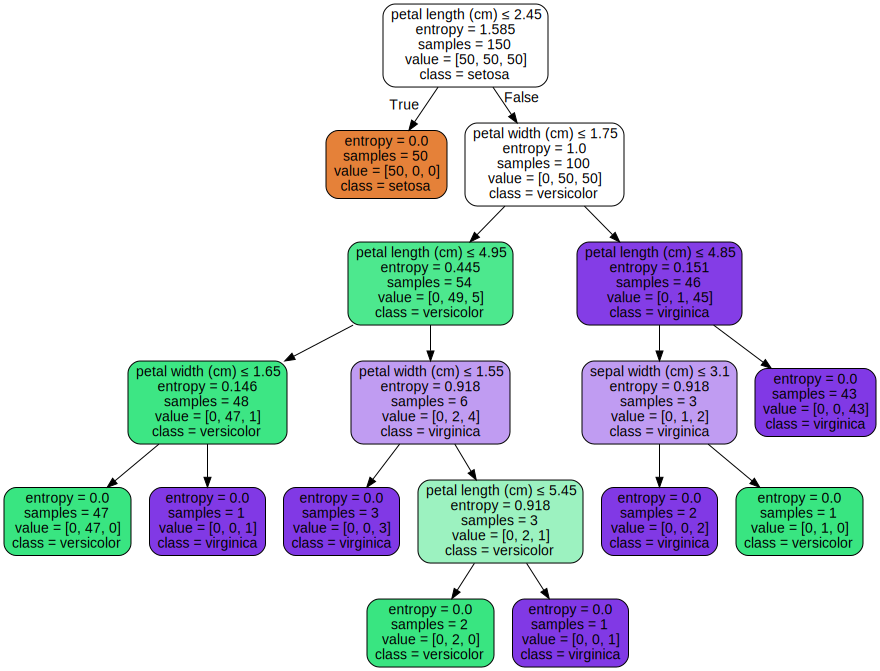

In [20]:
graph2

In [21]:
clf3=tree.DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf3.fit(iris.data,iris.target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

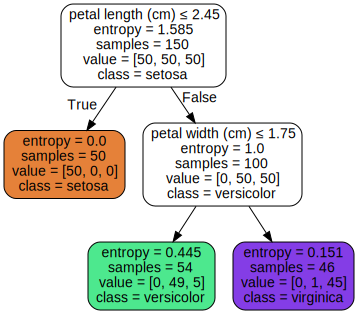

In [22]:
dot_data3=tree.export_graphviz(clf3,out_file=None,
                             feature_names=iris.feature_names,
                            class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True
                             )
graph3=graphviz.Source(dot_data3)
graph3

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target, clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [25]:
confusion_matrix(iris.target,clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [26]:
confusion_matrix(iris.target,clf3.predict(iris.data)) # 너무 오버피팅 되지 않도록 프루닝해줌

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

# 3. Training - Test 구분 및 Confusion matrix 계산

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=1)

In [29]:
y_train

array([2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0,
       2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0,
       1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 1, 2,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1,
       0, 1])

In [30]:
clf4=tree.DecisionTreeClassifier(criterion="entropy")

In [31]:
clf4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
confusion_matrix(y_test, clf4.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 11]], dtype=int64)

# 4. Decision regression tree

In [43]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() # 1차원 변환
y[::5] += 3* (0.5 - rng.rand(16))

In [44]:
regr1 = tree.DecisionTreeRegressor(max_depth=2)
regr2 = tree.DecisionTreeRegressor(max_depth=5)

In [45]:
regr1.fit(X,y)
regr2.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [46]:
X_test=np.arange(0.0,5.0,0.01)[:,np.newaxis]
X_test

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

In [47]:
y_1=regr1.predict(X_test)
y_2=regr2.predict(X_test)

In [48]:
y_1

array([ 0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71

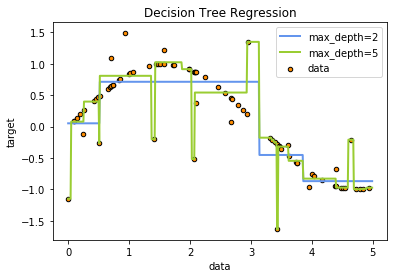

In [51]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

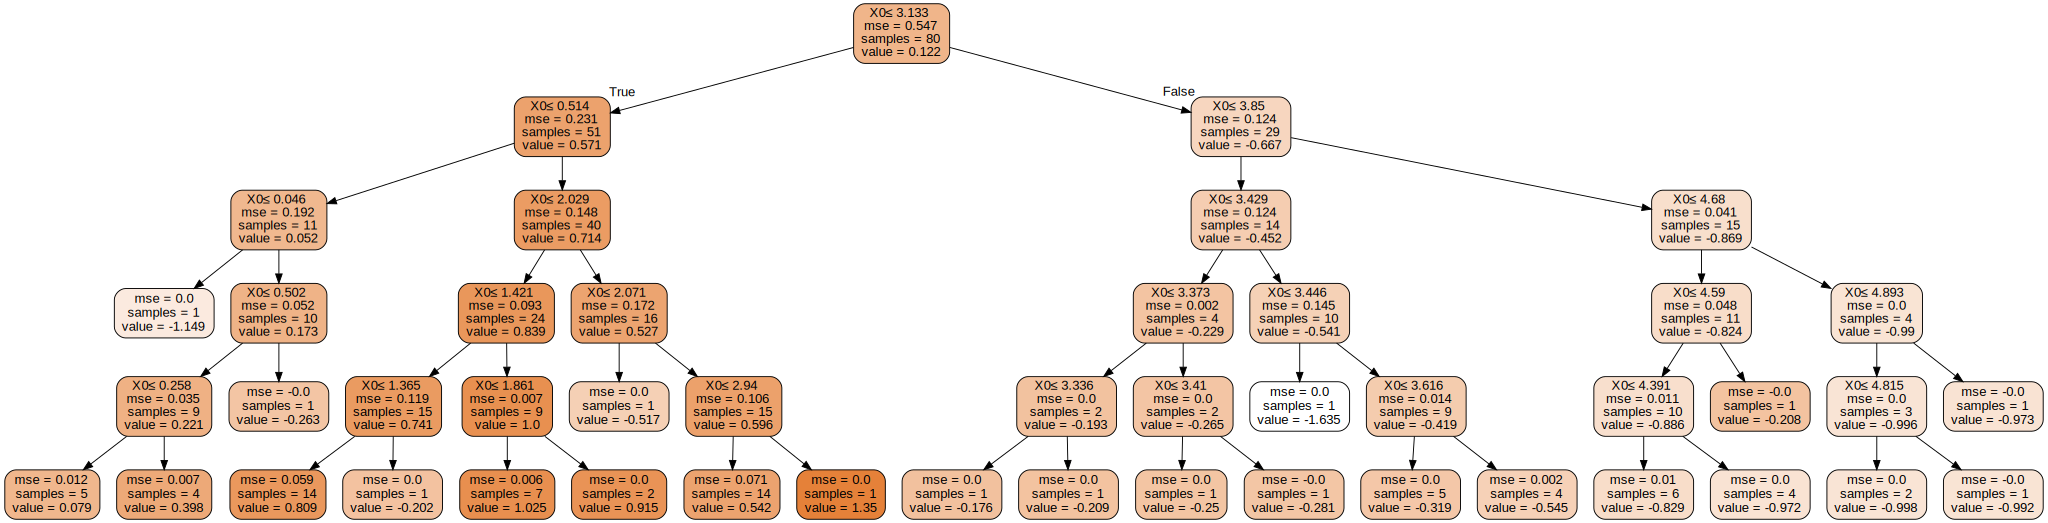

In [52]:
dot_data4 = tree.export_graphviz(regr2, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)
graph4 = graphviz.Source(dot_data4) 
graph4